In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


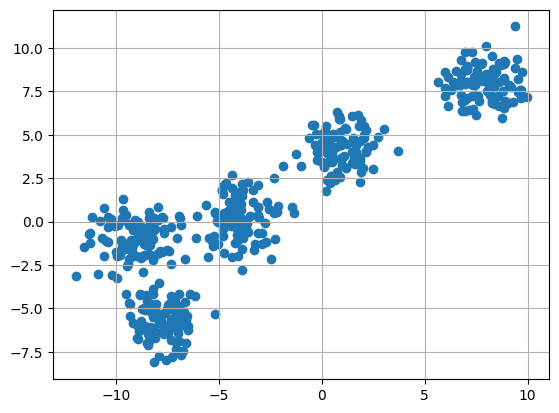

In [6]:
X,y=make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)

fig=plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



def initialize_centroids(data, k):
    """Randomly initialize k centroids from the data points."""
    np.random.seed(0)
    random_indices = np.random.permutation(data.shape[0])
    centroids = data[random_indices[:k]]
    return centroids

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Update centroids by computing the mean of all points in each cluster."""
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def has_converged(old_centroids, centroids, tolerance=1e-4):
    """Check if the centroids have stopped moving."""
    return np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tolerance)

def k_means(data, k, max_iters=300):
    """Implement K-Means clustering from scratch."""
    centroids = initialize_centroids(data, k)
    for i in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        
        # Check for convergence
        if has_converged(old_centroids, centroids):
            break
    return labels, centroids

# Example usage
X,y=make_blobs(n_samples = 500, n_features = 2, centers = 5, random_state = 3)


data = np.random.rand(100, 2)  # Replace this with your actual dataset
k = 5  # Set the number of clusters
labels, centroids = k_means(data, k)

# Visualization
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [7]:
#set the number of cluster 
k=5
clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []},
 3: {'center': array([-1.33144319, -0.43023013]), 'points': []},
 4: {'center': array([ 0.47220939, -0.35227962]), 'points': []}}

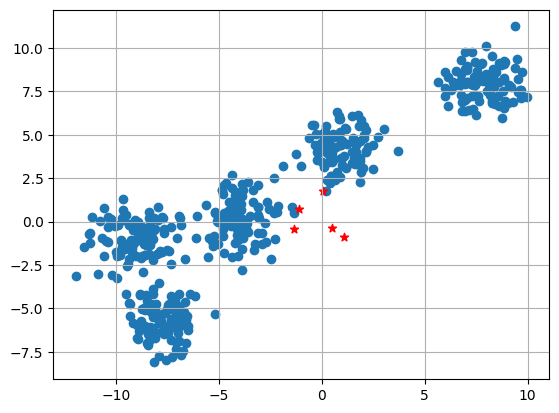

In [8]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [9]:
#Define Euclidean distance
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [10]:
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

In [11]:
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

In [12]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred   

In [13]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

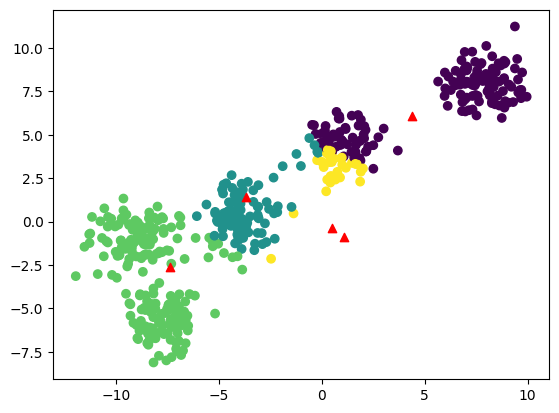

In [14]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()